In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
X = dataset.iloc[:, 1:2].values #we could've wrote iloc[:, 1] so X will be considered as a vector,however in ML model especially 
                               ##here in regression we want that our feature X  be considered as a matrix not a vector
y = dataset.iloc[:, 2].values

##### we don't need to do the split because we only have ten observations, and it will be ridiculous if we do so. we also need to have an accurate model here, so we gonna train our model with the whole set

In [4]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

### Fitting Linear Regression to the dataset

In [7]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()  ## first LinearRegression object
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Fitting Polynomial Regression to the dataset

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_reg = PolynomialFeatures(degree = 2)  ## polynom of degree 2
X_poly = poly_reg.fit_transform(X)  ### create matrixe with three column x^0, x^1, x^2 transform X to new matrix with poly terms
## create a second linearreg object to fit our x_poly in it
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualizing the Linear regression results

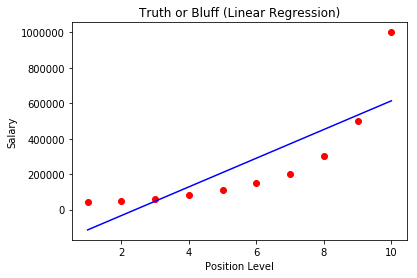

In [22]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualizing the Polynomial Regression results

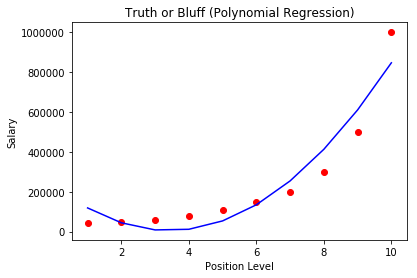

In [23]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
## above we could have put lin_reg_2.predict(X_poly) but we want a generakized formula so we put the fit_transform part
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Function to plot 2,3, 4 degree

In [58]:
def plot_reg(x,z):
    for i in range(2,5):
        poly_reg = PolynomialFeatures(degree = i)  ## polynom of degree 2
        X_poly = poly_reg.fit_transform(x)  ### create matrixe with three column x^0, x^1, x^2 transform X to new matrix with poly terms
        ## create a second linearreg object to fit our x_poly in it
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, z)

        plt.scatter(x, z, color='red')
        plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')
        ## above we could have put lin_reg_2.predict(X_poly) but we want a generakized formula so we put the fit_transform part
        plt.title('Truth or Bluff (Polynomial Regression), degree: ' +str(i))
        plt.xlabel('Position Level')
        plt.ylabel('Salary')
        plt.show()

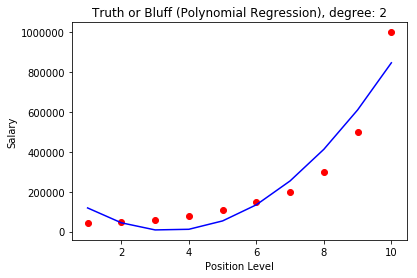

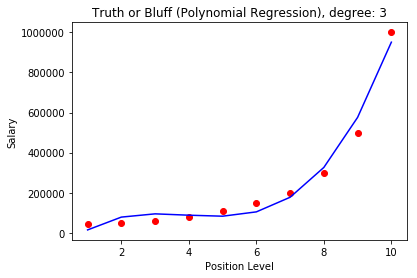

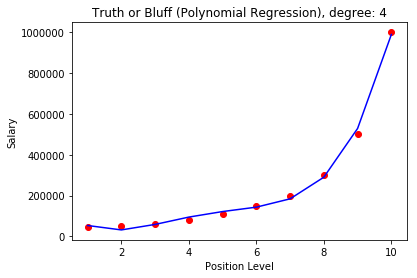

In [59]:
plot_reg(X,y)

#### the code is giving us some predictions for levels from 1 to 10 then putting some straight lines between Red points. we can improve the plot, to have the real continuous curve between each two points, by instead of having predictions between points incremented by one, we re going to have them incremented by a higher resolution like a 0.1 step.

In [40]:
X_grid = np.arange(min(X), max(X), 0.1) ## vector from X [1, 1.1 ,1.2,       , 9.8,9.9, 10]
X_grid = X_grid.reshape((len(X_grid),1))   ### reshape to a matrix with one column and len(x_grid) lines

In [60]:
def plot_reg(x):
    for i in range(2,5):
        poly_reg = PolynomialFeatures(degree = i)  ## polynom of degree 2
        X_poly = poly_reg.fit_transform(X)  ### create matrixe with three column x^0, x^1, x^2 transform X to new matrix with poly terms
        ## create a second linearreg object to fit our x_poly in it
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, y) 

        
        plt.scatter(X, y, color='red')
        plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='blue')
        plt.title('Truth or Bluff (Polynomial Regression), degree: ' +str(i))
        plt.xlabel('Position Level')
        plt.ylabel('Salary')
        plt.show()

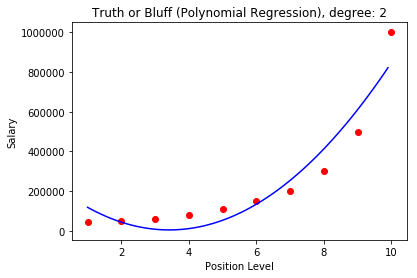

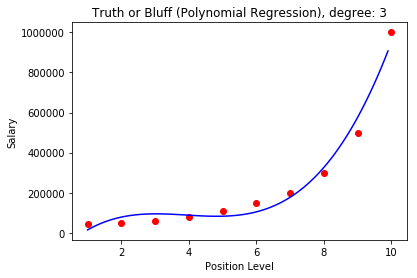

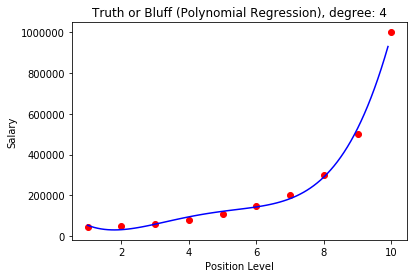

In [61]:
plot_reg(X_grid,y)

### Predicting new results with Linear Regression, the salary for 6.5 level

In [62]:
lin_reg.predict(6.5)

array([330378.78787879])

### Predicting new results with Polynomial Regression, salary for a level of 6.5

In [64]:
poly_reg = PolynomialFeatures(degree = 4)  ## polynom of degree 2
X_poly = poly_reg.fit_transform(X)  ### create matrixe with three column x^0, x^1, x^2 transform X to new matrix with poly term
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) 
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])